In [1]:
output_dir='./output_zero_2'
txt_path='./零之使魔.txt'
novel_path='./零之使魔.md'
wiki_path='./零之使魔_wiki.md'
chunk_len=1000
sub_chunk_len=300
import os


Saved chapter titles to ./output_zero_2\chapter_titles.txt


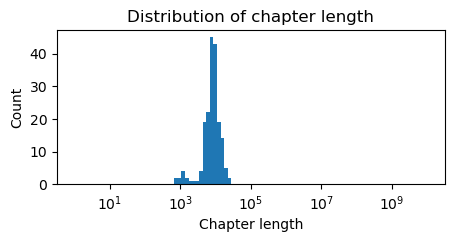

Number of chapters:  186


In [13]:
import importlib; import novel; importlib.reload(novel)
from novel import *

if not os.path.exists(novel_path):
    convert_txt_to_md(txt_path, novel_path)

if not os.path.exists(os.path.join(output_dir, 'chunks')) or not os.path.exists(os.path.join(output_dir, 'chapters')):
    chapters = read_novel(novel_path)
    chapters, chunks = split_chapters(chapters, chunk_len=chunk_len)
    save_chunks(chunks, os.path.join(output_dir, 'chunks'))
    save_chapters(chapters, os.path.join(output_dir, 'chapters'))
chunks=load_chunks(os.path.join(output_dir, 'chunks'))
chapters=load_chapters(os.path.join(output_dir, 'chapters'))
save_chapter_titles(chapters, os.path.join(output_dir, 'chapter_titles.txt'))

plot_chapter_length(chapters)

In [3]:
import importlib;import my_llm;importlib.reload(my_llm)
from my_llm import llm_chatgpt

In [23]:
import importlib;import my_chains;importlib.reload(my_chains)
from my_chains import ChunkSummaryChain,RefineChunkSummaryChain


chunk_summary_chain = ChunkSummaryChain(llm=llm_chatgpt)
refine_chunk_summary_chain=RefineChunkSummaryChain(llm=llm_chatgpt)

def del_chunk_summary_(chunks,chunk_ids:List[int]):
    for chunk_id in chunk_ids:
        chunk=chunks[chunk_id]
        if 'summary' in chunk:
            del chunk['summary']
        if 'characters_summary' in chunk:
            del chunk['characters_summary']

def summary_chunks_(chunks,chunk_ids:List[int],slient=False,override=False):
    for chunk_id in chunk_ids:
        chunk=chunks[chunk_id]
        chunk_path = os.path.join(os.path.join(output_dir,'chunks'), 'CHUNK_{0:05d}.json'.format(chunk['chunk_id']))
        print('processing chunk',chunk_path)
        previous_chunk_id=chunk.get('previous_chunk_id',None)
        if previous_chunk_id is not None:
            retrospect=chunks.get(previous_chunk_id,{}).get('summary',None)
            if retrospect is None:
                print('Missing retrospect for chunk_id',previous_chunk_id,'skipping chunk_id',chunk_id)
                continue
            retrospect_characters_summary=chunks.get(previous_chunk_id,{}).get('characters_summary','')
            retrospect=retrospect+' '+retrospect_characters_summary
        else:
            retrospect=None
        if chunk.get('summary_draft',None) is None or chunk.get('characters_summary',None) is None or override:
            if not slient: print('retrospect',retrospect)
            if not slient: print(chunk['text'].replace('\n',''))
            response=chunk_summary_chain({'text':chunk['text'],'retrospect':retrospect})
            chunk['summary_draft']=response['summary']
            chunk['characters_summary']=response['characters_summary']
            save_chunk(chunk,os.path.join(output_dir,'chunks'))
        if chunk.get('characters',None) is None or chunk.get('summary',None) is None or override:
            response=refine_chunk_summary_chain({'text':chunk['text'],'characters_summary':chunk['characters_summary'],'summary':chunk['summary_draft']})
            if response.get('error',None) is not None:
                print('error',response['error'])
                print(response['response'])
                continue
            chunk['characters']=response['characters']
            chunk['summary']=response['summary']
            save_chunk(chunk,os.path.join(output_dir,'chunks'))
        
        if not slient: print('characters',chunk['characters'])
        if not slient: print('summary',chunk['summary'])
    print('Done')

llm_chatgpt.show_query=llm_chatgpt.show_response=False
# # del_chunk_summary_(chunks,chapters[]['chunk_ids'])
# summary_chunks_(chunks,chapters[37]['chunk_ids'])

for iChapter in range(21,90):
    summary_chunks_(chunks,chapters[iChapter]['chunk_ids'],slient=True,override=True)

processing chunk ./output_zero_2\chunks\CHUNK_00250.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00250.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00250.json
processing chunk ./output_zero_2\chunks\CHUNK_00251.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00251.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00251.json
processing chunk ./output_zero_2\chunks\CHUNK_00252.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00252.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00252.json
processing chunk ./output_zero_2\chunks\CHUNK_00253.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00253.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00253.json
processing chunk ./output_zero_2\chunks\CHUNK_00254.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CH

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 485619e89f07cc58e8718d4ed528fe41 in your message.).


Saved chunk to ./output_zero_2\chunks\CHUNK_00254.json
processing chunk ./output_zero_2\chunks\CHUNK_00255.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00255.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00255.json
processing chunk ./output_zero_2\chunks\CHUNK_00256.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00256.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00256.json
processing chunk ./output_zero_2\chunks\CHUNK_00257.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00257.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00257.json
processing chunk ./output_zero_2\chunks\CHUNK_00258.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00258.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00258.json
processing chunk ./output_zero_2\chunks\CHUNK_00259.json
requ

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID d3b7e2895c7aa11e92162c348f6f5e02 in your message.).


Saved chunk to ./output_zero_2\chunks\CHUNK_00363.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00363.json
processing chunk ./output_zero_2\chunks\CHUNK_00364.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00364.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00364.json
processing chunk ./output_zero_2\chunks\CHUNK_00365.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00365.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00365.json
processing chunk ./output_zero_2\chunks\CHUNK_00366.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00366.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00366.json
processing chunk ./output_zero_2\chunks\CHUNK_00367.json
requesting summary
Saved chunk to ./output_zero_2\chunks\CHUNK_00367.json
requesting RefineChunkSummaryChain
Saved chunk to ./output_ze

ValueError: Did not get output keys that were expected. Got: {'response', 'error', 'json'}. Expected: {'response', 'summary', 'error', 'json', 'characters'}.

In [ ]:
import importlib;import my_chains;importlib.reload(my_chains)
from my_chains import Story2JsonChain

story2json_chain = Story2JsonChain(llm=llm_chatgpt)

def novel2script_chunks_(chunks,chunk_ids:List[int],override=False,slient=False):
    for chunk_id in chunk_ids:
        print('processing chunk_id',chunk_id)
        chunk=chunks[chunk_id]
        previous_chunk_id=chunk.get('previous_chunk_id',None)
        chunk={k:v for k,v in chunk.items() if v is not None and v!=''}
        if chunk.get('summary',None) is None or chunk.get('characters',None) is None:
            print('missing summary or characters for chunk_id',chunk_id)
            continue
        if previous_chunk_id is not None:
            retrospect=chunks.get(previous_chunk_id,{}).get('summary',None)
            if retrospect is None:
                print('Missing retrospect for chunk_id',previous_chunk_id,'skipping chunk_id',chunk_id)
                continue
        else:
            retrospect=None
        if chunk.get('script_items',None) is None or override:
            script_items=[]
            split_subchunk_(chunk,sub_chunk_len=sub_chunk_len)
            for sub_chunk in chunk['sub_chunks']:
                inputs={'text':sub_chunk['text'],'summary':chunk['summary'],'characters_summary':chunk['characters'],'retrospect':retrospect}
                if not slient: print('summary',inputs['summary'])
                if not slient: print('characters_summary',inputs['characters_summary'])
                if not slient: print('retrospect',inputs['retrospect'])
                if not slient: print(inputs['text'])
                response=story2json_chain(inputs)
                sub_chunk['script_items']=response['json']
                save_chunk(chunk,os.path.join(output_dir,'chunks'))
                for item in sub_chunk['script_items']:
                    if not slient: print(item)
                script_items+=sub_chunk['script_items']
            for item in script_items:
                item['chunk_id']=chunk_id
                item['chapter_id']=chunk['chapter_id']
            chunk['script_items']=script_items
            save_chunk(chunk,os.path.join(output_dir,'chunks'))
    print('Done')

llm_chatgpt.show_query=llm_chatgpt.show_response=False
# novel2script_chunks_(chunks,chapters[37]['chunk_ids'],override=True)

for iChapter in range(21,90):
    novel2script_chunks_(chunks,chapters[iChapter]['chunk_ids'],override=True,slient=True)

processing chunk_id 405
summary 才人和德福林哥乘坐难民船离开钟乳洞，才人想寻找回到原来世界的方法，德福林哥建议当佣兵，才人回忆起自己被称为“纲达鲁乌”的传说使魔，最后才人离开时想起路易丝正在举行结婚典礼。
characters [{'name': '才人', 'description': '主角，想寻找回到原来世界的方法', 'action': '乘坐难民船离开钟乳洞'}, {'name': '德福林哥', 'description': '才人的搭档，建议当佣兵', 'action': '建议当佣兵'}, {'name': '路易丝', 'description': '才人的亲密人，正在举行结婚典礼', 'action': '正在举行结婚典礼'}]
retrospect None
更新时间:2009-5-23 11:26:20 本章字数:13137
第二天早晨……
在钟乳洞建造的港口中，才人为了乘坐‘鹰’号而混在了从纽卡斯尔城疏散的人群之中。前一天搭乘的‘玛丽&#8226;格兰特’号上的人也在其中。
「正因为爱，所以也会有不得不离开的时候，是这样吗？……」
背上的德福林哥小声地说着。没有插在鞘里，就这样用绳子挂在背上。
「不要再说了」
「为什么呢？」
「被你这样说就会非常地生气」
「正因为爱恋着，所以也会有装作什么也不知道的时候呢……是这样吧」
「所以说了叫你不要再讲了」
requesting Story2JsonChain
Saved chunk to ./output_zero_2\chunks\CHUNK_00405.json
{'info': '第二天早晨，在钟乳洞建造的港口中，才人为了乘坐‘鹰’号而混在了从纽卡斯尔城疏散的人群之中。前一天搭乘的‘玛丽·格兰特’号上的人也在其中。'}
{'char': '德福林哥', 'think': '正因为爱，所以也会有不得不离开的时候，是这样吗？……', 'expression': '小声地说着'}
{'char': '才人', 'say': '不要再说了'}
{'char': '德福林哥', 'say': '为什么呢？'}
{'char': '才人', 'say': '被你这样说就会非常地生气'}
{'char': '德福林哥', 'think': '正因为爱恋着，所以也会有装作什么也

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 590b260fa3e84762c53a561702a215c4 in your message.).


Saved chunk to ./output_zero_2\chunks\CHUNK_00415.json
{'info': '才人看着地面。'}
{'say': '敌人？从下面袭来吗？', 'char': '才人'}
{'think': '刚想朝下挥剑，地面就裂了开来，一个茶色的生物探出头来。', 'char': '才人'}
{'expression': '惊讶', 'say': '啊啊啊啊啊啊？！', 'char': '才人'}
{'expression': '心奋', 'act': '缠着路易丝的身体', 'char': '巨大鼹鼠贝露丹蒂'}
{'say': '你……巨大鼹鼠贝露丹蒂！应该是基修的使魔啊！', 'char': '才人'}
{'expression': '怒', 'say': '喂！贝露丹蒂！你准备挖到那里去啊！……', 'char': '基修'}
{'info': '满脸是土的基修注意到了呆滞着的才人和躺在旁边的路易丝，呆呆的说道。'}
{'say': '哦呀！你们！原来在这里呢！', 'char': '基修'}
{'expression': '惊讶', 'say': '为，为什么你会在这里啊！', 'char': '才人'}
{'say': '没有什么。在与土块的一战中去胜我的我们，不休息地追在你们后面。怎么说这个任务都关系到了公主殿下的名誉呢', 'char': '基修'}
summary 才人和德福林哥打败了瓦尔德，但才人身体已经达到极限。路易丝受伤昏迷，才人决定守护她。突然地面隆起，原来是基修和丘鲁克追着贝露丹蒂来到这里。才人将路易丝交给基修，回礼拜堂寻找威尔士的遗物，发现了阿比昂王家代代相传的‘风之戒’。才人决定守护自己所相信的东西。
characters [{'name': '基修', 'description': '才人的盟友，帮助才人打败瓦尔德', 'action': '帮助才人照顾路易丝并追踪贝露丹蒂'}, {'name': '丘鲁克', 'description': '才人的盟友，帮助才人打败瓦尔德', 'action': '帮助才人照顾路易丝并追踪贝露丹蒂'}]
retrospect 才人和德福林哥打败了瓦尔德，但才人身体已经达到极限。路易丝受伤昏迷，才人决定守护她。突然地面隆起，情节未知。
「这里可是在云层上呢！怎么

In [ ]:
chunks[1]